<a href="https://colab.research.google.com/github/isunitha98selvan/random-projects/blob/master/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
train_ds = torchvision.datasets.MNIST(root='/', train=True, transform=transforms.ToTensor(), download=True)
test_ds = torchvision.datasets.MNIST(root='/', train=False, transform=transforms.ToTensor(), download=True)

Extracting /MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/raw


Extracting /MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/raw


Extracting /MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/raw




Extracting /MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
train_ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: /
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_ds

Dataset MNIST
    Number of datapoints: 10000
    Root location: /
    Split: Test
    StandardTransform
Transform: ToTensor()

In [22]:
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size = 256, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_ds,batch_size=256, shuffle=True)

In [23]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 256
learning_rate = 0.001

In [24]:
class Net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.input = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.input(x)
        out = self.relu(out)
        out = self.output(out)
        return out

model = Net(input_size, hidden_size, num_classes)
print(model)

Net(
  (input): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=500, out_features=10, bias=True)
)


In [25]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [27]:
import matplotlib.pyplot as plt

tensor(8)


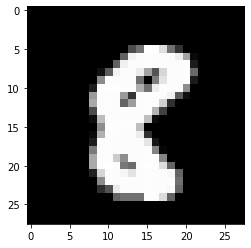

In [31]:
for image, label in train_loader:
  plt.imshow(image[0].reshape(28,28), cmap="gray")
  print(label[0])
  break

In [33]:
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i,(image,labels) in enumerate(train_loader):
    images = image.reshape(-1,28*28)
    labels = labels

    output = model(images)
    loss = loss_fn(output, labels)

    opt.zero_grad()
    loss.backward()
    opt.step()

    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/235], Loss: 0.2714
Epoch [1/5], Step [200/235], Loss: 0.1969
Epoch [2/5], Step [100/235], Loss: 0.2129
Epoch [2/5], Step [200/235], Loss: 0.1162
Epoch [3/5], Step [100/235], Loss: 0.1409
Epoch [3/5], Step [200/235], Loss: 0.0739
Epoch [4/5], Step [100/235], Loss: 0.0746
Epoch [4/5], Step [200/235], Loss: 0.0686
Epoch [5/5], Step [100/235], Loss: 0.0645
Epoch [5/5], Step [200/235], Loss: 0.0601


tensor(9)
tensor(9)


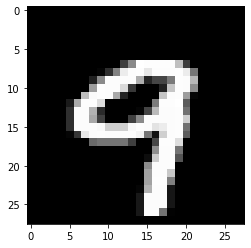

In [39]:
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28)
    plt.imshow(images[0].reshape(28,28), cmap="gray")
    labels = labels
    print(labels[0])
    outputs = model(images)
    _, predicted = torch.max(outputs.data,1)
    total+= labels.size(0)
    print(predicted[0])
    correct+=(predicted==labels).sum().item()
    break
  #print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
